___

<img src='steam.png' /></a>
___
# Proyecto de regresión logística

En este proyecto, trabajaremos con un conjunto de datos publicitarios falsos, que indica si un usuario de Internet en particular hizo clic o no en un anuncio en el sitio web de una empresa. Intentaremos crear un modelo que prediga si harán clic o no en un anuncio en función de las características de ese usuario.

Este conjunto de datos contiene las siguientes características:

* 'Daily Time Spent on Site': tiempo del consumidor en el sitio en minutos
* 'Age': edad del cliente en años
* 'Area Income': Prom. Ingresos del área geográfica del consumidor
* 'Daily Internet Usage': Prom. minutos al día el consumidor está en internet
* 'Ad Topic Line': título del anuncio
* 'City': Ciudad del consumidor
* 'Male': si el consumidor era o no hombre
* 'Country': País del consumidor
* 'Timestamp': hora en que el consumidor hizo clic en el anuncio o en la ventana cerrada
* 'Clicked on Ad': 0 o 1 indicaron hacer clic en el anuncio



### PRUEBA ESPECIALISTA DE DATOS
* Jennifer Vanessa Salao

## Importar librerías

**Importa algunas librerías que crees que necesitarás (¡O simplemente impórtalas a medida que avanzas!)**

In [1]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()  
import numpy as np
from scipy.stats import pearsonr 
sns.set(style="darkgrid", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Obtener los datos
**Leer el archivo advertising.csv y configúrarlo en un Dataframe llamado ad_data.**

In [2]:
ad_data = pd.read_csv('Dataset/advertising.csv')


**Revisar los primeros 10 ejemplos del Dataframe**

In [3]:
ad_data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


**Usa info y describe() en ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Análisis exploratorio de datos

¡Usemos Seaborn para explorar los datos!

¡Intenta recrear las tramas que se muestran a continuación!

**Crea un histograma de age**

Text(0.5, 0, 'Age')

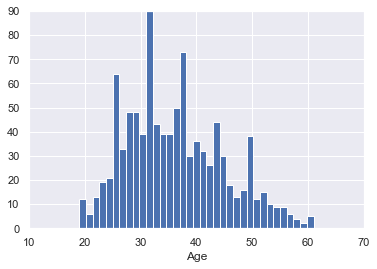

In [6]:
ad_data['Age'].hist(bins=35)
plt.xlim(10,70)
plt.ylim(0,90)
plt.xlabel('Age')

**Crea a jointplot mostrando Area Income vs Age.**

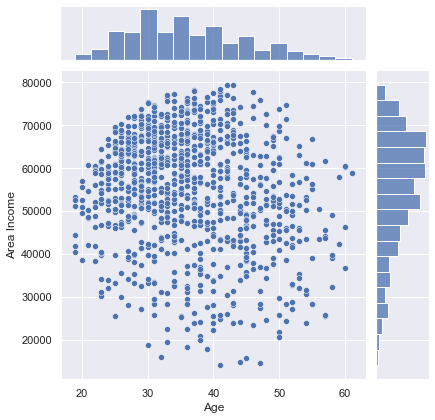

In [7]:
sns.jointplot(x="Age", y="Area Income", kind="scatter", data=ad_data)

**Crea un jointplot mostrando la distribución kde de Daily Time spent on site vs. Age.**

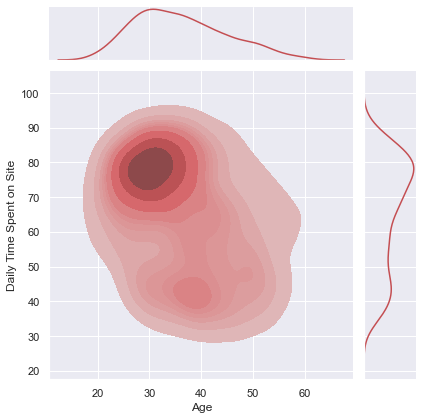

In [8]:
sns.jointplot(x="Age", y="Daily Time Spent on Site", data=ad_data, kind='kde', color='r', shade=True)

**Crear un jointplot de 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

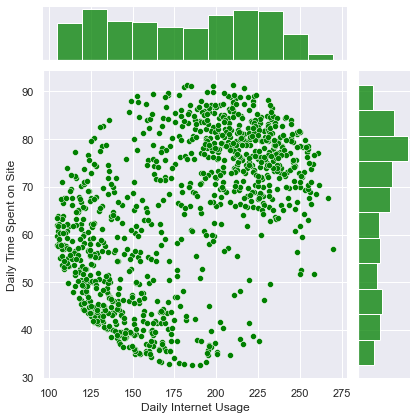

In [9]:
sns.jointplot(x="Daily Internet Usage", y="Daily Time Spent on Site", kind="scatter", data=ad_data, color='green')

**Finalmente, crear un pairplot con el hue definido con la columna caracteristica 'Clicked on Ad'.**

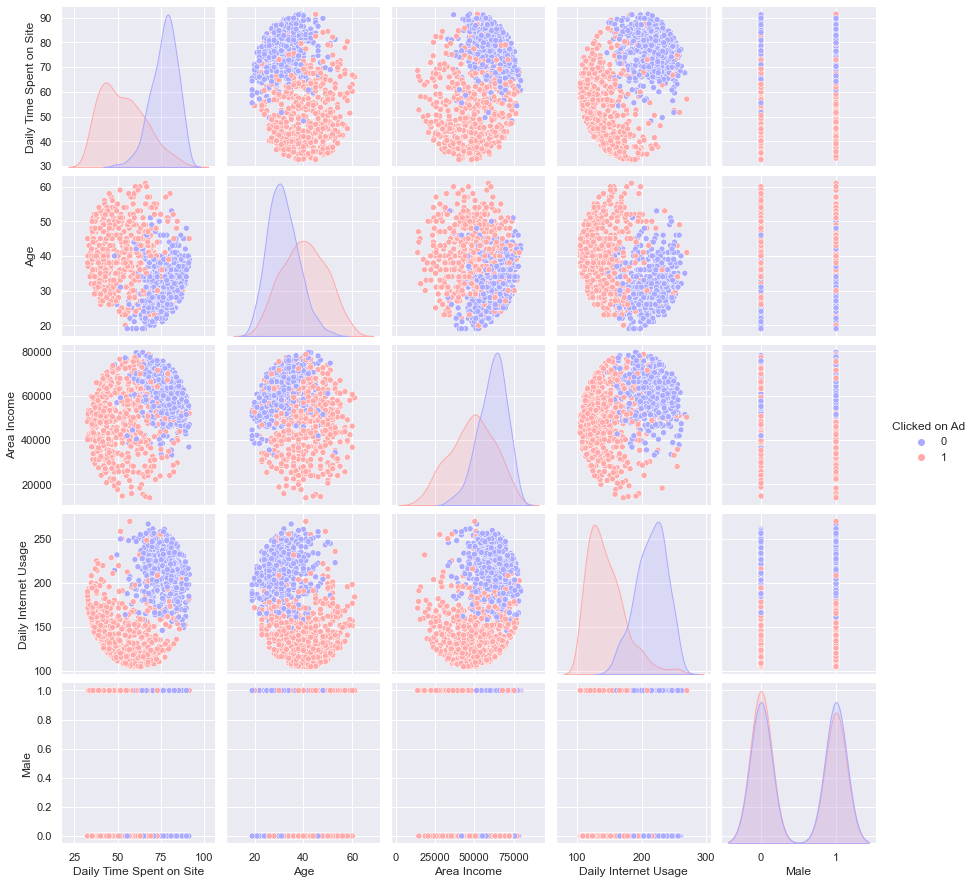

In [10]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr', aspect=1)

# Regresión logística

¡Ahora es el momento de hacer una separación de los datos para el entrenamiento y para la prueba. Luego entrenar a nuestro modelo!

¡Tendrás la libertad de elegir las columnas que quieras entrenar!

In [11]:
#correlación entre variables 

print('Pearson: ', ad_data['Clicked on Ad'].corr(ad_data['Daily Time Spent on Site'], method='pearson'))
print('Spearman: ', ad_data['Clicked on Ad'].corr(ad_data['Daily Time Spent on Site'], method='spearman'))
print('Kendall: ', ad_data['Clicked on Ad'].corr(ad_data['Daily Time Spent on Site'], method='kendall'))

Pearson:  -0.748116564119635
Spearman:  -0.7448725321410692
Kendall:  -0.608553657328716


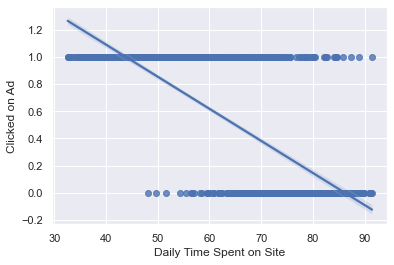

In [12]:
sns.regplot(x='Daily Time Spent on Site', y='Clicked on Ad', data=ad_data);

In [13]:
print('Pearson: ', ad_data['Clicked on Ad'].corr(ad_data['Daily Internet Usage'], method='pearson'))
print('Spearman: ', ad_data['Clicked on Ad'].corr(ad_data['Daily Internet Usage'], method='spearman'))
print('Kendall: ', ad_data['Clicked on Ad'].corr(ad_data['Daily Internet Usage'], method='kendall'))

Pearson:  -0.78653917587149
Spearman:  -0.7766070163104524
Kendall:  -0.634435470861791


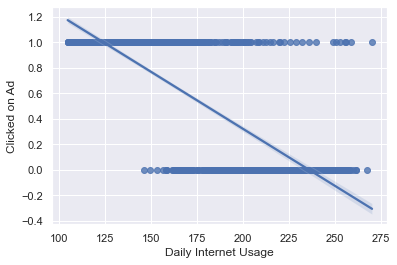

In [14]:
sns.regplot(x='Daily Internet Usage', y='Clicked on Ad', data=ad_data);

**Dividir los datos en un conjunto de entrenamiento y un conjunto de pruebas usando train_test_split ****

In [15]:
#**Con ciertos campos que tenemos en el dataset predeciremos si el cliente haría clic en el anuncio**
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [16]:
# X contendra las variables que ayudara al modelo a predecir
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male',]].values
# y contendra el target es decir la variable a predecir
y = ad_data['Clicked on Ad'].values

In [17]:
# para el test se fijara el 30% de los datos, el resto será para train
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3)

In [18]:
# normalizar datos
escalar = StandardScaler()
X_train= escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

**Entrenar y ajustar un modelo de regresión logística en el conjunto de entrenamiento.**

In [19]:
lrg = LogisticRegression()


In [20]:
lrg.fit(X_train, y_train)

LogisticRegression()

## Predicciones y evaluaciones
**Ahora predice valores para los datos de prueba.**

In [21]:
#predicción
Y_pred=  lrg.predict(X_test)

**Crear un reporte de clasificación para el modelo.**

In [22]:
from sklearn.metrics import precision_score #Calculo la precisión del modelo
from sklearn.metrics import accuracy_score #Calculo la exactitud del modelo
from sklearn.metrics import recall_score #Calculo la sensibilidad del modelo
from sklearn.metrics import f1_score #Calculo el Puntaje F1 del modelo
from sklearn.metrics import classification_report

In [23]:

precision = precision_score(y_test, Y_pred)
exactitud = accuracy_score(y_test, Y_pred)
sensibilidad = recall_score(y_test, Y_pred)
puntajef1 = f1_score(y_test, Y_pred)

print('Precisión del modelo:', precision)
print('exactitud del modelo:', exactitud)
print('sensibilidad del modelo:', sensibilidad)
print('puntajef1 del modelo:', puntajef1)

Precisión del modelo: 0.9664429530201343
exactitud del modelo: 0.97
sensibilidad del modelo: 0.972972972972973
puntajef1 del modelo: 0.9696969696969697


In [24]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       152
           1       0.97      0.97      0.97       148

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



## Compara tus resultados!!

In [25]:
from sklearn.metrics import confusion_matrix
from string import ascii_uppercase
from sklearn.metrics import plot_confusion_matrix

In [26]:
matriz= confusion_matrix(y_test, Y_pred)
print(matriz)

[[147   5]
 [  4 144]]


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


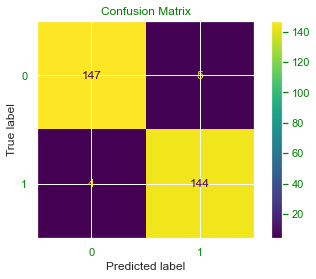

In [27]:
matrix = plot_confusion_matrix(lrg, X_test, y_test)
matrix.ax_.set_title('Confusion Matrix', color='green', y=None)

plt.gcf().axes[0].tick_params(colors='green')
plt.gcf().axes[1].tick_params(colors='green')

### Conclusión
* En la comparación de resultados se puede ver mediante la matriz de confusión que los resultados son favorables siendo los verdaderos positivos y los falsos positivos la mayor cantidad, pudimos preveer que sería un resultado favorable gracias al reporte de clasificación.

* Es decir con los campos [['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male',]] podemos predecir si hará o no clic en el anuncio